In [28]:
### importing Libraries for Time series
from warnings import filterwarnings
filterwarnings("ignore")

In [62]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
data=pd.read_csv("TATAMOTORS.csv",index_col="Date")
data.index=pd.to_datetime(data.index)
#print(data1.shape)
data.head()
#data1.info()
#data1.Columns=['Diesel','Petrol']
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [ ]:
*About the Stock Data* 
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange)
India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a
metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.
Symbol- Cipla Ltd is one of the leading pharmaceutical Comapnies in India.
EQ=
VWAP=The Volume Weighted Average Price (VWAP) is used to reveal the true average price that a stock was traded at during any 
given point in the day. The formula is simply a matter of dividing total dollar volume by total share volume.
VWAP = (Number of Shares Bought x Share Price) / Total Volum

In [64]:
data.shape   # Shape of the dataset

(5306, 14)

In [65]:
#In the given Datsets, Trades, Deliverable Volume, %Deliverble contain NaN Value.So we remove it.
data.drop(['Trades', 'Deliverable Volume','%Deliverble'],axis=1,inplace=True)

**Plotting Closing price over Time**

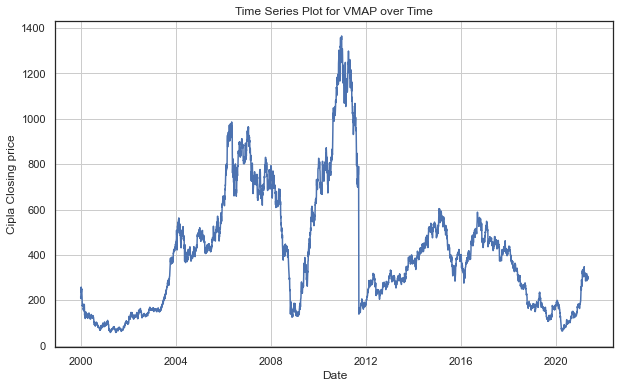

In [66]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Cipla Closing price')
plt.title('Time Series Plot for VMAP over Time')
plt.show()

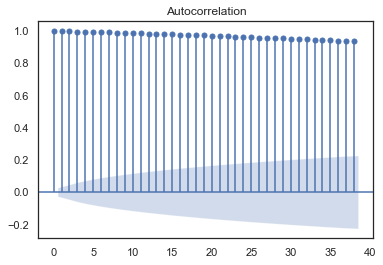

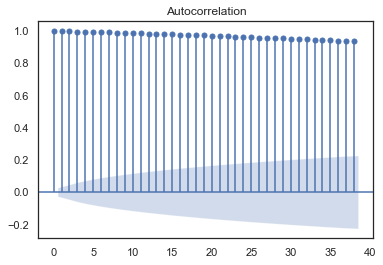

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Close'])

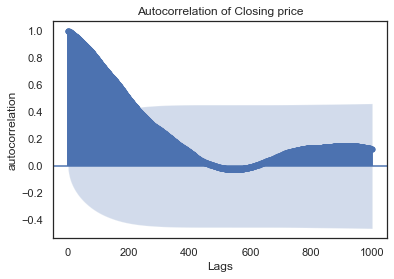

In [68]:
plot_acf(data['Close'],lags=1000)
plt.xlabel('Lags')
plt.ylabel('autocorrelation')
plt.title('Autocorrelation of Closing price')
plt.show()

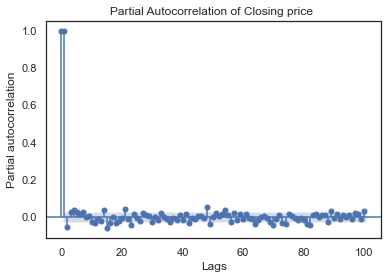

In [70]:
plot_pacf(data.Close,lags=100)
plt.xlabel('Lags')
plt.ylabel('Partial autocorrelation')
plt.title('Partial Autocorrelation of Closing price ')
plt.show()

**QQ plot**

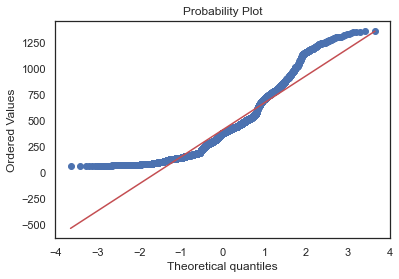

In [71]:
scipy.stats.probplot(data.Close, plot=pylab)
pylab.show()

In [55]:
Data it not normally distributed, however this is what we usually expect from timeseries

SyntaxError: invalid syntax (Temp/ipykernel_2256/261056053.py, line 1)

**Adfuller test to check stationarity**

In [72]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data.Close)
print('p-value: %2f' % result[1])
result

p-value: 0.169526


(-2.3076091005997186,
 0.16952562810863325,
 22,
 5283,
 {'1%': -3.4315884024621197,
  '5%': -2.8620872464268756,
  '10%': -2.56706129882746},
 43228.01671408399)

Here in the results,Here p-value $\geq$ 0.05, We fail to reject $H_0$ .The time series is non-stationary.

In [75]:
df=pd.DataFrame(data)
df[0]=df.reset_index(inplace=True)    #Making the index
#df

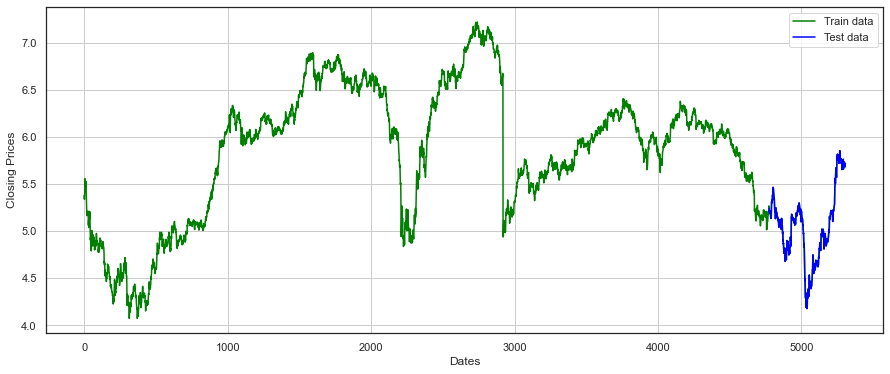

In [76]:
df_log = np.log(df['Close'])
train_data, test_data = df_log[:int(len(df_log)*0.90)], df_log[int(len(df_log)*0.90):]
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [84]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
#print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18054.951, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18075.403, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18076.539, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18056.948, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18075.764, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18076.715, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18080.164, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18079.043, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-18079.972, Time=4.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-18078.085, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18008.838, Time=2.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-18076.838, Time=3.70 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-18082.161, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-18078.703, Time=0.34 sec
 ARIM

In [85]:
model = ARIMA(train_data, order=(5,1,0))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4774
Model:                 ARIMA(5, 1, 0)   Log Likelihood                9047.716
Method:                       css-mle   S.D. of innovations              0.036
Date:                Sun, 24 Apr 2022   AIC                         -18081.431
Time:                        15:44:12   BIC                         -18036.135
Sample:                             1   HQIC                        -18065.518
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.145e-05      0.001     -0.061      0.952      -0.001       0.001
ar.L1.D.Close     0.0690      0.014      4.764      0.000       0.041       0.097
ar.L2.D.Close    -0.0278      0.015     

In [83]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4775
Model:               SARIMAX(1, 1, 2)   Log Likelihood                9045.080
Date:                Sun, 24 Apr 2022   AIC                         -18082.161
Time:                        15:41:47   BIC                         -18056.277
Sample:                             0   HQIC                        -18073.068
                               - 4775                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5939      0.234      2.535      0.011       0.135       1.053
ma.L1         -0.5248      0.234     -2.244      0.025      -0.983      -0.066
ma.L2         -0.0741      0.016     -4.627      0.000      -0.105      -0.043
sigma2         0.0013   1.62e-06    819.230      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         156100729.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                           -19.62
Prob(H) (two-sided):                  0.00   Kurtosis:                       887.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

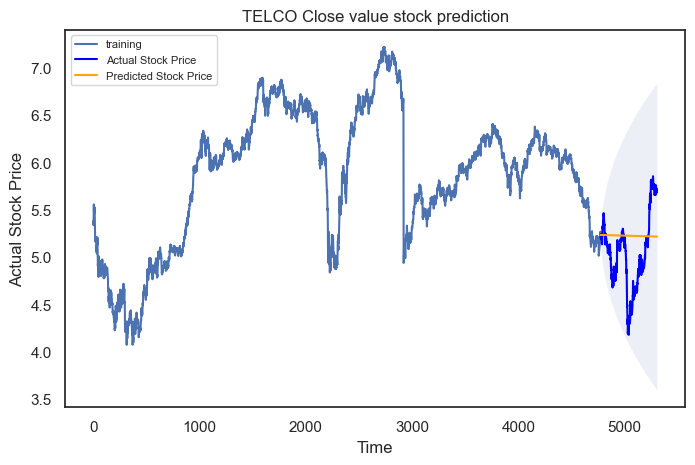

In [95]:
fc, se, conf = fitted.forecast(531, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0],index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                  alpha=.10)
plt.title('TELCO Close value stock prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()